In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
from scipy.stats import iqr

from statsmodels.tools import add_constant
from statsmodels.discrete.discrete_model import Logit

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
plt.style.use("ggplot")

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('final_home_purchase_loans_data_capstone2.csv')

/home/connie/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17,18,19,21,22,23,24,25,26,27,28,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data.head()

,activity_year,lei,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,derived_sex,action_taken,purchaser_type,preapproval,loan_type,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,occupancy_type,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,applicant_ethnicity-2,co-applicant_ethnicity-1,co-applicant_ethnicity-2,applicant_race-1,applicant_race-2,co-applicant_race-1,co-applicant_race-2,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,aus-1,aus-2,aus-3,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage
0,2019,549300HW662MN1WU8550,31084,CA,6037.0,C,FHA:First Lien,Joint,1,2,2,2,1,2,2,515000.0,96.5,3.5,0.751,2,13707.7,NaN,995,NaN,1029.54,360,NaN,NaN,2,2,2,2,525000,1,128.0,30%-<36%,2,9,2.0,NaN,1.0,NaN,5.0,NaN,5.0,NaN,1,2,65-74,45-54,1,NaN,NaN,10,NaN,NaN,NaN,5240,83.11,73100,117
1,2019,549300HW662MN1WU8550,41740,CA,6073.0,C,FHA:First Lien,Sex Not Available,1,2,2,2,1,2,2,485000.0,96.5,2.789,0.203,2,13283.6,NaN,0,NaN,NaN,360,NaN,NaN,2,2,2,2,495000,1,160.0,50%-60%,1,9,3.0,NaN,3.0,NaN,6.0,NaN,6.0,NaN,3,3,25-34,25-34,1,NaN,NaN,10,NaN,NaN,NaN,4713,20.73,86300,138
2,2019,549300HW662MN1WU8550,11244,CA,6059.0,C,Conventional:First Lien,Sex Not Available,3,0,2,1,1,2,2,575000.0,65.812,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,2,2,2,2,875000,1,127.0,50%-60%,3,9,3.0,NaN,3.0,NaN,6.0,NaN,6.0,NaN,3,3,35-44,35-44,2,1.0,NaN,1,NaN,NaN,NaN,4646,42.57,97900,149
3,2019,549300HW662MN1WU8550,31084,CA,6037.0,C,Conventional:First Lien,Male,1,1,2,1,1,2,2,475000.0,54.286,3.625,0.283,2,19726.1,NaN,13490,NaN,4047,360,NaN,NaN,2,2,2,2,895000,1,231.0,38,3,9,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1,1,25-34,45-54,2,1.0,NaN,10,NaN,NaN,NaN,3455,85.85,73100,107
4,2019,549300HW662MN1WU8550,47300,CA,6107.0,C,Conventional:First Lien,Joint,5,0,2,1,1,2,2,355000.0,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,2,2,2,2,NaN,1,639.0,NaN,9,9,3.0,NaN,3.0,NaN,5.0,NaN,5.0,NaN,2,1,25-34,25-34,1,NaN,NaN,10,NaN,NaN,NaN,5960,31.80,50900,179


In [5]:
#let's see all the columns and number of rows and columns
print(data.columns, "\n"*2,f'number of columns/features: {len(data.columns)}, number of rows/applications: {len(data.income)}')

Index(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code',
       'conforming_loan_limit', 'derived_loan_product_type', 'derived_sex',
       'action_taken', 'purchaser_type', 'preapproval', 'loan_type',
       'lien_status', 'reverse_mortgage', 'open-end_line_of_credit',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'occupancy_type',
       'income', 'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity-1',
       'applicant_ethnicity-2', 'co-applicant_ethnicity-1',
       'co-applicant_ethnicity-2', 'applicant_race-1', 'applicant_race-2',
    

In [6]:
#examining data make-up
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662100 entries, 0 to 662099
Data columns (total 61 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   activity_year                      662100 non-null  int64  
 1   lei                                662100 non-null  object 
 2   derived_msa-md                     662100 non-null  int64  
 3   state_code                         662100 non-null  object 
 4   county_code                        652313 non-null  float64
 5   conforming_loan_limit              657162 non-null  object 
 6   derived_loan_product_type          662100 non-null  object 
 7   derived_sex                        662100 non-null  object 
 8   action_taken                       662100 non-null  int64  
 9   purchaser_type                     662100 non-null  int64  
 10  preapproval                        662100 non-null  int64  
 11  loan_type                          6621

In [7]:
#this will be my target. per data index, 1 and 6 will be considered 'approved loan'
data['action_taken'].value_counts(normalize=True)

1    0.586822
6    0.168981
4    0.115587
3    0.069260
5    0.028112
2    0.027071
8    0.003037
7    0.001130
Name: action_taken, dtype: float64

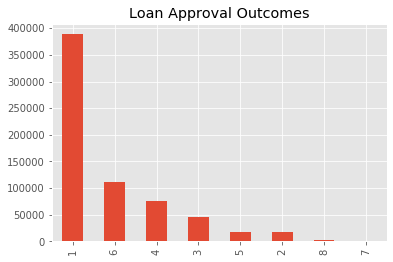

In [8]:
#plotting out the loan outcomes prior to defining target values
ax = data['action_taken'].value_counts().plot.bar()
ax.set_title('Loan Approval Outcomes')
plt.show()

In [9]:
#taking a peek at income. income is in thousands
#the highest is 1.6 billion!! I sense an outlier
#oh, there are also negative incomes. could be people who reported income loss in application/taxes?
#min and max of data['income'] #1,630,917,000 max #-13,549,000 min

print(f'max:{(data["income"].max())}, min: {(data["income"].min())}')

max:1630917.0, min: -13549.0


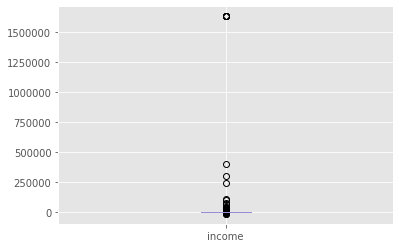

In [10]:
#the income as it stands now is too full of outliers to use.
#we have to either drop the outliers or take the log of all the incomes to bring the outliers down

data['income'].plot.box()

plt.show()

In [11]:
#90,422 null values in income

data.income.isnull().sum()

90422

In [12]:
#I'll be calculating the IQR to find out the outliers for the income data

q1 = data['income'].quantile(0.25)
q3 = data['income'].quantile(0.75)
iqr = q3-q1
print(f'IQR: {iqr}, Q1: {q1}, Q2: {q3}')
print(f'outlier if < than: {q1 - 1.5*iqr} OR greater than: {q3 + 1.5*iqr}')

IQR: 110.0, Q1: 78.0, Q2: 188.0
outlier if < than: -87.0 OR greater than: 353.0


In [13]:
#how many datapoints are outliers by above definition?

print(data[data['income'] < -87]['income'].count()) #remember, these outliers are negative
print(data[data['income'] > 353]['income'].count())

#so in total we would have 72 + 41599 = 41,671 outliers to get rid of if we choose to discard them

72
41599


In [14]:
#removing rows of 72 outliers which are below -87,000 and 41599 outliers which exceed 353,000 in income

data2 = data[(data['income'] >= -87) & (data['income'] <= 353)]

In [15]:
data2.income.min(), data2.income.max(), len(data2.income)

(-87.0, 353.0, 530007)

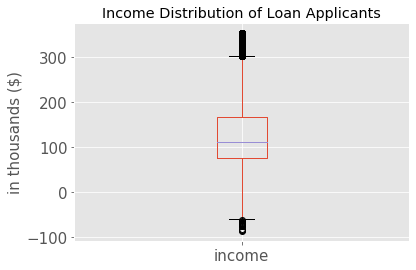

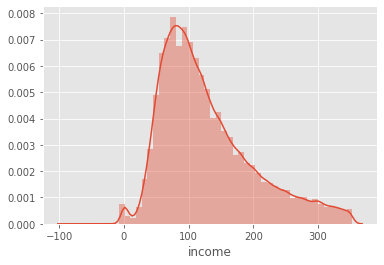

In [16]:
#plotting income without outliers

ax = data2['income'].plot.box(fontsize=15)
ax.set_title('Income Distribution of Loan Applicants')
ax.set_ylabel('in thousands ($)', fontsize = 15)

plt.show()

sns.distplot(data2['income'])
plt.show()

In [17]:
#checking the mean income
np.mean(data2['income'])

128.5584284735862

In [18]:
#transforming target variables to loan approved or loan denied

data2['target'] = data2['action_taken'].map({1:1, 6:1, 2:0, 3:0, 4:0, 5:0, 7:0, 8:0})

/home/connie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#new target breakdown: 0 = loan denied, 1 = loan approved
print(data2.target.value_counts())
print(data2.target.value_counts(normalize=True))

1    384994
0    145013
Name: target, dtype: int64
1    0.726394
0    0.273606
Name: target, dtype: float64


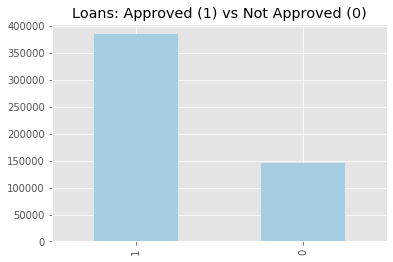

In [20]:
#plot proportion of loans approved vs loans denied

ax = data2['target'].value_counts().plot.bar(stacked=True, colormap = 'Paired')

ax.set_title('Loans: Approved (1) vs Not Approved (0)')
plt.show()

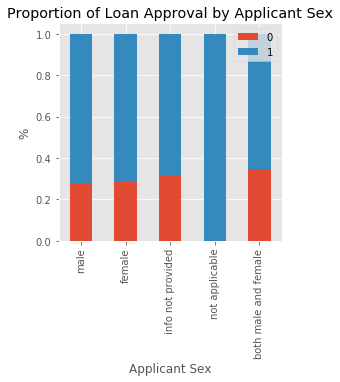

In [21]:
#I also want to see if there is a noticeable difference in loan approvals based on gender

gender = pd.crosstab(data2['applicant_sex'], data2['target'])

labels = ['male', 'female', 'info not provided', 'not applicable', 'both male and female']
width = .35
ax = gender.div(gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4), label = 't')

ax.set_xlabel('Applicant Sex')
ax.set_ylabel('%')
ax.set_title('Proportion of Loan Approval by Applicant Sex')
ax.set_xticklabels(labels)

ax.legend()

plt.show()

#the 'both female and male' bin could have been checked by transgender applicants or maybe applicants who applied as a couple
#there doesn't seem to be a noticeable difference when looking at approvals based on gender

In [22]:
#examining the crosstab of gender/loan outcome
gender[:1]

target,0,1
applicant_sex,,
1,89606,238144


In [23]:
#examining the crosstab of gender/loan outcome
gender

target,0,1
applicant_sex,,
1,89606,238144
2,44577,111790
3,10710,23089
4,4,11750
6,116,221


In [24]:
#I think age would be a worthy feature to examine. index does not elaborate what the 8888 and 9999 are, 
#so I will group them together as an 'unknown' bin

data2['applicant_age'] = data2['applicant_age'].map({'8888': 'unknown', '9999':'unknown', 
                                                     '35-44':'35-44', '25-34':'25-34', '45-54':'45-54',
                                                     '55-64':'55-64', '65-74':'65-74', '<25':'<25', '>74':'>74'})


/home/connie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
#checking the new breakdown of age
#I'm not surprised that the 34-44 bin shows the most applicants. I would guess that is the most common bracket 
#for applicants who are first time home buyers as well

data2['applicant_age'].value_counts()

35-44      151719
25-34      149137
45-54       99292
55-64       65716
65-74       31668
<25         14912
>74          9631
unknown      7932
Name: applicant_age, dtype: int64

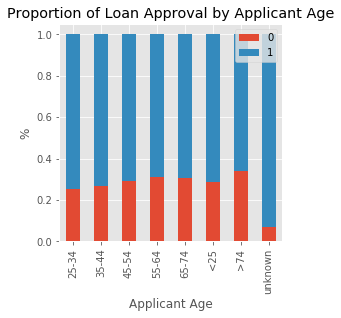

In [26]:
#again, there does not appear to be a noticeable difference in the proportion of loan outcomes according to
#applicant age

age = pd.crosstab(data2['applicant_age'], data2['target'])

ax = age.div(age.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4), label = 't')

ax.set_xlabel('Applicant Age')
ax.set_ylabel('%')
ax.set_title('Proportion of Loan Approval by Applicant Age')
# ax.set_xticklabels(labels)

ax.legend()

plt.show()

In [27]:
#examining age crosstab with loan outcome
age

target,0,1
applicant_age,,
25-34,37416,111721
35-44,40687,111032
45-54,28864,70428
55-64,20329,45387
65-74,9631,22037
<25,4267,10645
>74,3253,6378
unknown,566,7366


In [28]:
#checking the new breakdown of race

data2['applicant_race-1'].value_counts()

5.0     313959
6.0      89138
2.0      77517
3.0      21263
7.0      11823
1.0       4139
21.0      3991
4.0       2015
22.0      1715
23.0      1701
27.0       911
26.0       563
25.0       535
44.0       324
24.0       210
42.0        41
43.0        40
41.0        30
Name: applicant_race-1, dtype: int64

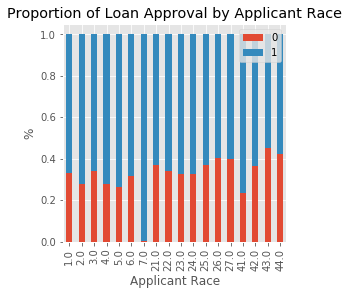

In [29]:
#plotting proportion of applicant race with loan outcomes

race = pd.crosstab(data2['applicant_race-1'], data2['target'])

ax = race.div(race.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4), label = 't')

ax.set_xlabel('Applicant Race')
ax.set_ylabel('%')
ax.set_title('Proportion of Loan Approval by Applicant Race')
# ax.set_xticklabels(labels)

ax.legend()

plt.show()

In [30]:
#brainstorm: alternative method to taking out all the outlier. I wonder if we could still make the distribution
#more normal, but keep the outliers
#how many applications from original data showed negative income?

data[data['income'] < 0]['income'].count()

165

In [31]:
data.head(2)

,activity_year,lei,derived_msa-md,state_code,county_code,conforming_loan_limit,derived_loan_product_type,derived_sex,action_taken,purchaser_type,preapproval,loan_type,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,occupancy_type,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,applicant_ethnicity-2,co-applicant_ethnicity-1,co-applicant_ethnicity-2,applicant_race-1,applicant_race-2,co-applicant_race-1,co-applicant_race-2,applicant_sex,co-applicant_sex,applicant_age,co-applicant_age,aus-1,aus-2,aus-3,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage
0,2019,549300HW662MN1WU8550,31084,CA,6037.0,C,FHA:First Lien,Joint,1,2,2,2,1,2,2,515000.0,96.5,3.5,0.751,2,13707.7,NaN,995,NaN,1029.54,360,NaN,NaN,2,2,2,2,525000,1,128.0,30%-<36%,2,9,2.0,NaN,1.0,NaN,5.0,NaN,5.0,NaN,1,2,65-74,45-54,1,NaN,NaN,10,NaN,NaN,NaN,5240,83.11,73100,117
1,2019,549300HW662MN1WU8550,41740,CA,6073.0,C,FHA:First Lien,Sex Not Available,1,2,2,2,1,2,2,485000.0,96.5,2.789,0.203,2,13283.6,NaN,0,NaN,NaN,360,NaN,NaN,2,2,2,2,495000,1,160.0,50%-60%,1,9,3.0,NaN,3.0,NaN,6.0,NaN,6.0,NaN,3,3,25-34,25-34,1,NaN,NaN,10,NaN,NaN,NaN,4713,20.73,86300,138


In [ ]:
#now let's try a diff method: take the log of incomes so we don't have to remove outliers
#but first, remember that you can't take the negative log of a number...
#so what if we take the negative incomes, abs value them, take the logs, then make them negative again..

In [ ]:
data[:1]['income']

In [ ]:
temp_df = data[data['income'] < 0]

In [ ]:
temp_df['income']

In [ ]:
abs(temp_df['income'])

In [ ]:
-np.log(abs(temp_df['income']))

In [ ]:
temp_df2 = temp_df.drop(columns='income')

In [ ]:
temp_df2['income'] = -np.log(abs(temp_df['income']))

In [ ]:
temp_df2.head()

In [ ]:
data3 = data[data['income'] >= 0]

In [ ]:
log_income = pd.concat([data3,temp_df2])

In [ ]:
log_income[log_income['income'] < 0].count()

In [ ]:
log_income[log_income['income'] == 0]['income'].count()

In [ ]:
log_income['income'] = log_income['income'].map({0:1})

In [ ]:
log_income[log_income['income'] < 0]['income'].count()

In [ ]:
data4 = data.copy()

In [ ]:
data4['log_income'] = 

In [ ]:


#data[data.income == 0] #3417 rows w 0 income which log also cannot process

In [ ]:
# TAKING A BREAK FROM LOG RN! JUST CONTINUE W NON OUTLIER DATA FOR NOW

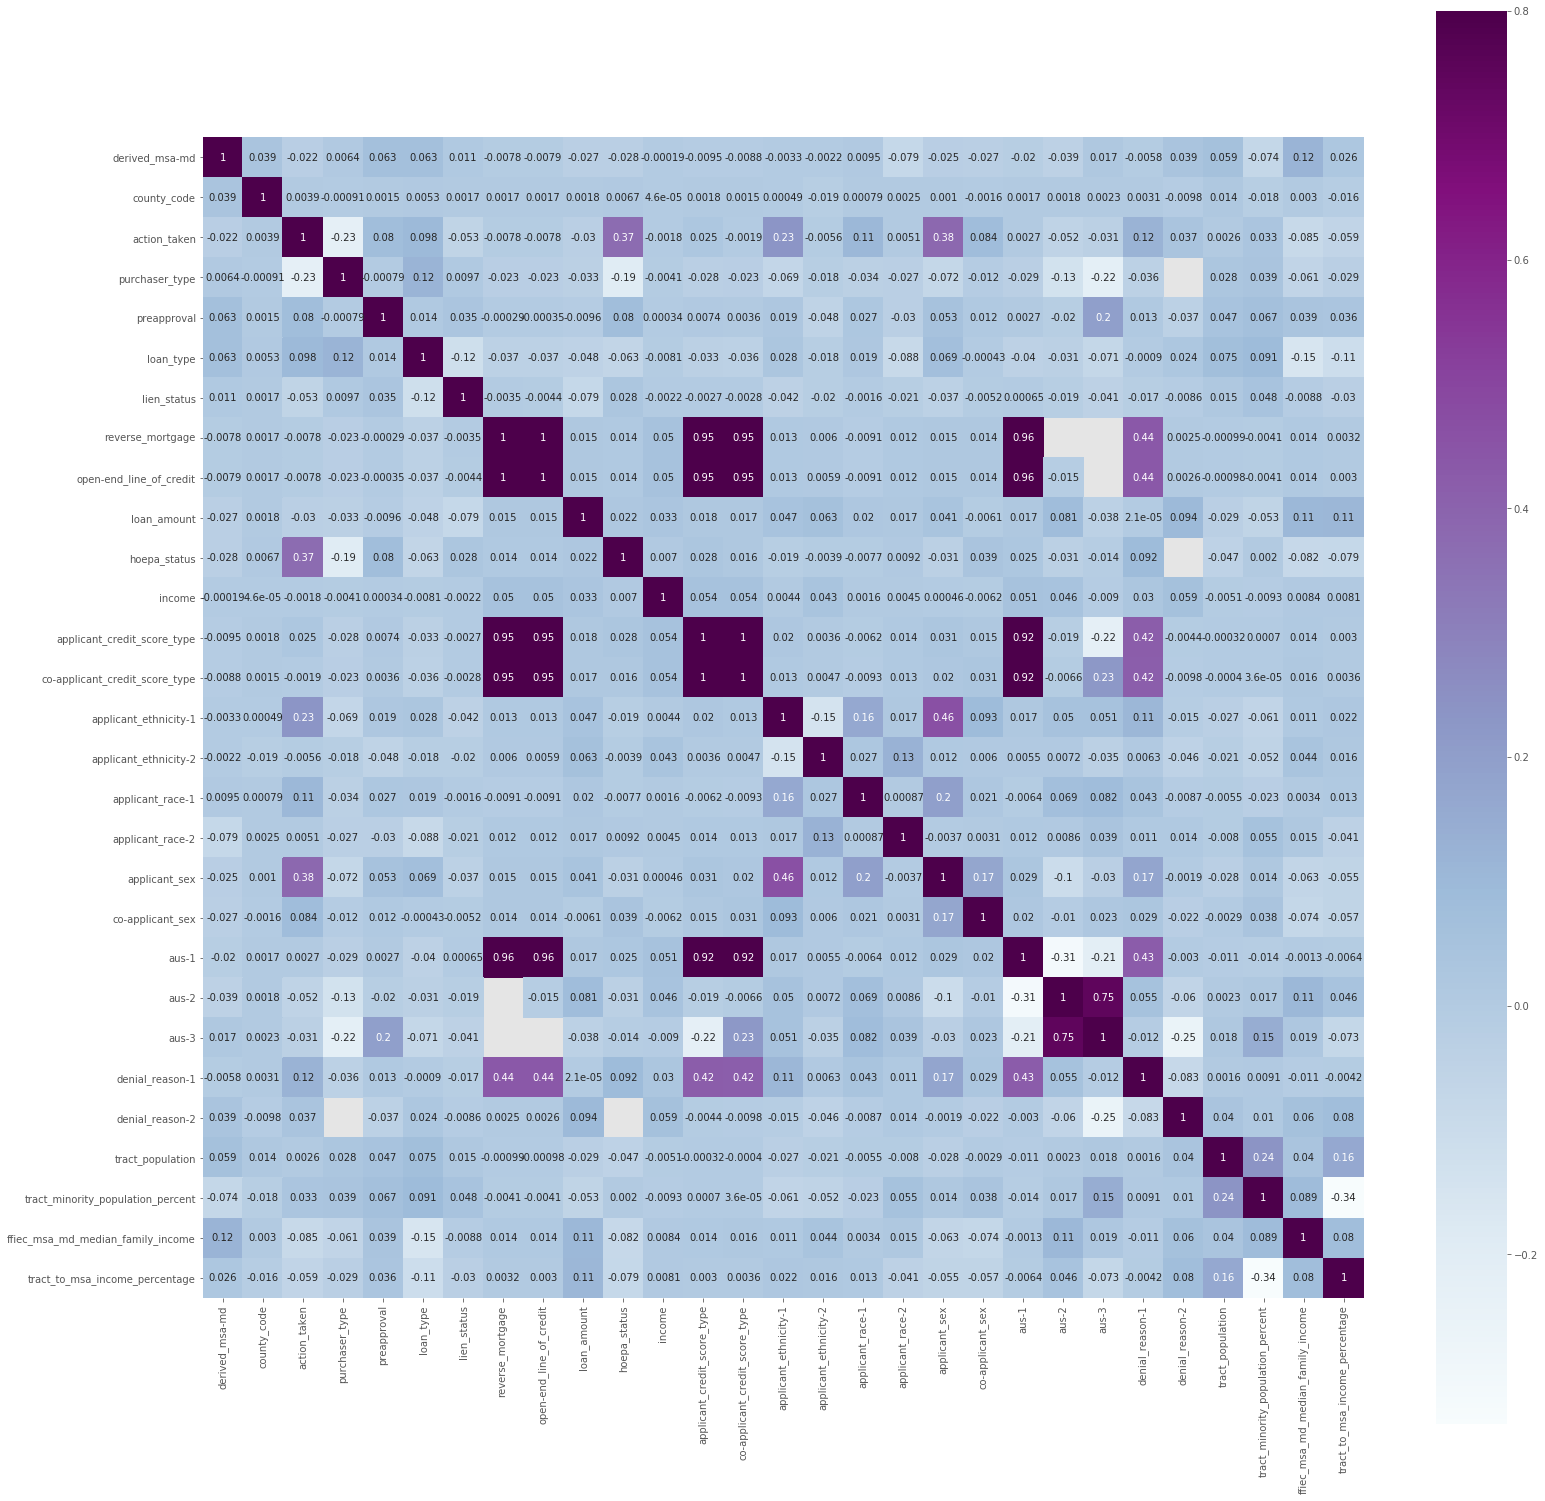

In [33]:
#seaborn heatmap version1 (this one is too crowded. taking some features out and reproducing below)
matrix = data[['lei', 'derived_msa-md', 'state_code', 'county_code',
        'conforming_loan_limit', 'derived_loan_product_type', 'derived_sex',
        'action_taken', 'purchaser_type', 'preapproval', 'loan_type',
        'lien_status', 'reverse_mortgage', 'open-end_line_of_credit',
        'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
        'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
        'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
        'property_value',
        'income', 'debt_to_income_ratio', 'applicant_credit_score_type',
        'co-applicant_credit_score_type', 'applicant_ethnicity-1',
        'applicant_ethnicity-2', 'applicant_race-1', 'applicant_race-2',
        'applicant_sex',
        'co-applicant_sex', 'applicant_age', 'co-applicant_age', 'aus-1',
        'aus-2', 'aus-3', 'denial_reason-1', 'denial_reason-2', 'tract_population',
        'tract_minority_population_percent',
        'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage']].corr()

f, ax = plt.subplots(figsize=(26,26))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

plt.show()

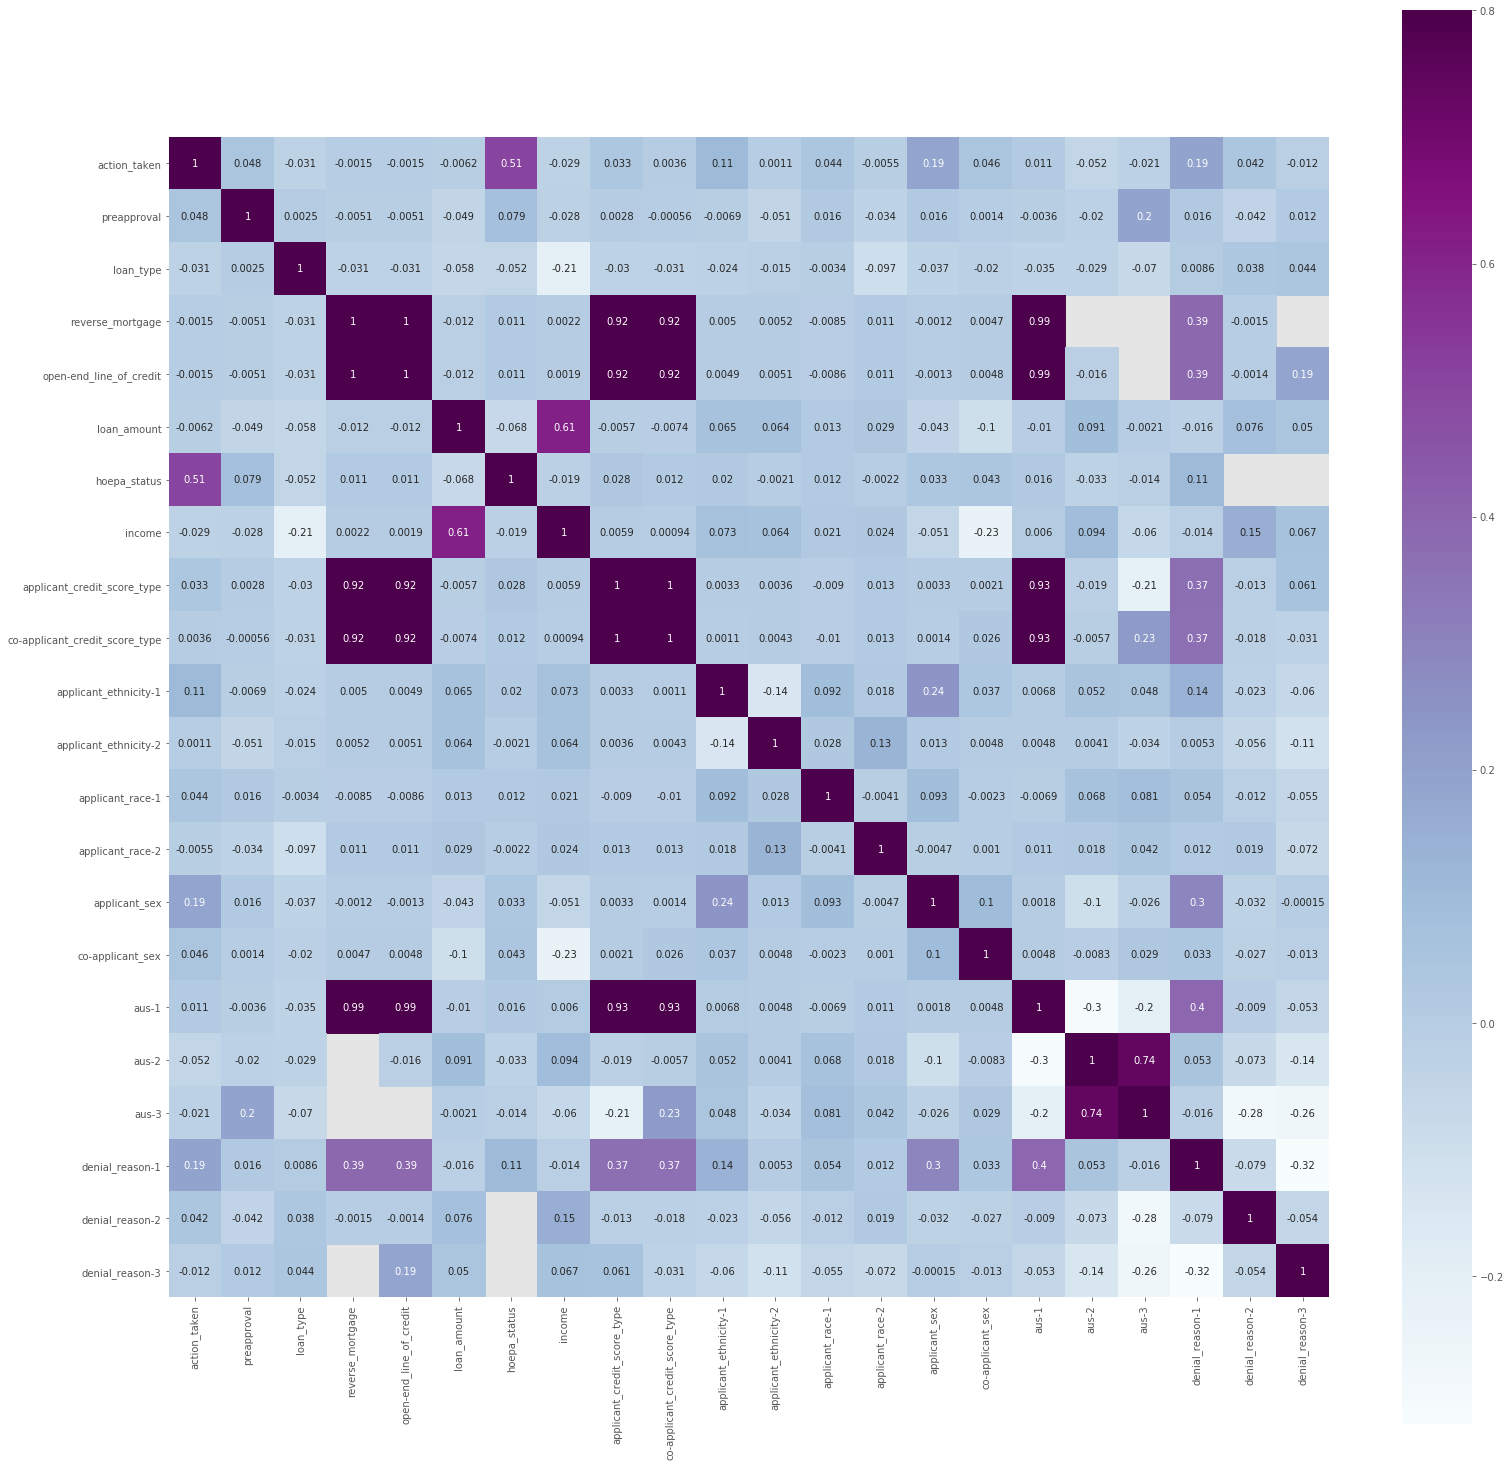

In [32]:
#seaborn heatmap version2
matrix2 = data2[['lei', 'state_code','conforming_loan_limit', 'derived_loan_product_type', 
        'action_taken', 'preapproval', 'loan_type',
        'reverse_mortgage', 'open-end_line_of_credit',
        'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
        'hoepa_status', 
        'property_value',
        'income', 'debt_to_income_ratio', 'applicant_credit_score_type',
        'co-applicant_credit_score_type', 'applicant_ethnicity-1',
        'applicant_ethnicity-2', 'applicant_race-1', 'applicant_race-2',
        'applicant_sex',
        'co-applicant_sex', 'applicant_age', 'co-applicant_age', 'aus-1',
        'aus-2', 'aus-3','denial_reason-1', 'denial_reason-2', 'denial_reason-3']].corr()

f, ax = plt.subplots(figsize=(26,26))
sns.heatmap(matrix2,vmax=.8,square=True,cmap="BuPu", annot = True)

plt.show()

In [ ]:
#seaborn heatmap version2
matrix3 = data2[['conforming_loan_limit', 'derived_loan_product_type', 
        'action_taken', 'preapproval', 'loan_type',
        'reverse_mortgage', 'open-end_line_of_credit',
        'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
        'hoepa_status', 'property_value',
        'income', 'debt_to_income_ratio', 'applicant_credit_score_type',
        'co-applicant_credit_score_type', 'applicant_ethnicity-1',
        'applicant_race-1',
        'applicant_sex','applicant_age', 'co-applicant_age', 'aus-1',
        'aus-2']].corr()

f, ax = plt.subplots(figsize=(26,26))
sns.heatmap(matrix3,vmax=.8,square=True,cmap="BuPu", annot = True)

plt.show()

In [ ]:
#prep data for logistic regression. if I use a logistic regression, the columns I choose cannot have nulls
#and should be dummified if output is categorical

#checking the nulls of some features:
# np.where(data.isnull().sum() > 0)
#[ 4,  5, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 32, 35, 38, 39,
#         40, 41, 42, 43, 44, 45, 51, 52, 54, 55, 56])

# loan_to_value_ratio      158813 #The ratio of the total amount of debt secured by the property to the value of the property relied on in making the credit decision
# interest_rate            140420
# rate_spread              207802
# total_loan_costs         196362
# total_points_and_fees    563778
# discount_points            449766
# lender_credits             409883
# loan_term                    2507
# prepayment_penalty_term    565289
# intro_rate_period        502964
# property_value           103162
# debt_to_income_ratio     143880
# applicant_ethnicity-1       197
# applicant_race-2         509000
# co-applicant_race-1          44
# co-applicant_race-2      541099
# aus-2                    529897
# aus-3     

data.isnull().sum()[[16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27]]

In [34]:
#looks like vast majority of loan terms are 360. We should replace nulls here with the mode, 360
data['loan_term'].value_counts() 

360      257757
360.0    188051
360      163947
276.0      6160
180        5273
          ...  
134.0         1
108.0         1
53            1
311           1
600           1
Name: loan_term, Length: 576, dtype: int64

In [35]:
#replace the 2507 missing values a mode 360
data2['loan_term'].fillna(data2['loan_term'].mode()[0], inplace=True)

/home/connie/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [36]:
#replace the missing race values with mode
data2['applicant_race-1'].fillna(data2['applicant_race-1'].mode()[0], inplace=True)

In [37]:
#replace the missing ethnicity values with mode
data2['applicant_ethnicity-1'].fillna(data2['applicant_ethnicity-1'].mode()[0], inplace=True)

In [ ]:
data['applicant_ethnicity-1'].value_counts()

In [ ]:
data['interest_rate'].max

In [ ]:
#these are the features I'll be using in my model based on relevance, completeness
target:
    action_taken #new name: 'target'
    
features to include in my logistic regression:
    income
    - state_code
    purchaser_type
    loan_amount
    hoepa_status
    - loan_term
    applicant_ethnicity-1
    applicant_race-1
    applicant_sex
    - applicant_age
    aus-1
    
    
maybe:
    - lei 
    preapproval
    lien_status
    reverse_mortgage
    - open-end_line_of_credit
    negative_amortization (dropped my rsquare)
    applicant_credit_score_type
    
highest psuedo r square: .6528

In [38]:
#proportion of loans approved (1) vs denied (0)
data2['target'].value_counts(normalize=True)

1    0.726394
0    0.273606
Name: target, dtype: float64

In [ ]:
#making dummies for age so I can use it in the logistic regression

dummies = pd.get_dummies(data['applicant_age'], prefix='applicant_age')

In [ ]:
dummies

In [ ]:
X2 = data.join(dummies)

In [ ]:
X2.head()

In [ ]:
#dummy testing
X3 = X2[['applicant_age_>74','applicant_age_<25','applicant_age_9999','applicant_age_8888',
        'applicant_age_65-74','applicant_age_55-64','applicant_age_45-54','applicant_age_35-44',
        'applicant_age_25-34']].values
X_const = add_constant(X3, prepend=True)
y = data['target'].values

logit_model = Logit(y, X_const).fit()

In [ ]:
#dummy testing
logit_model.summary()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y)
model = LogisticRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)
print(accuracy_score(y_test, predict), precision_score(y_test, predict), recall_score(y_test, predict))

#only income: accuracy: 0.725388, precision: 0.725388, recall: 1.0, psuedo r2: 6.083e-06 
#only hoepa_status: accuracy: 0.907480, precision: 1.0, recall: 0.87264, .6470 pseudo r2
#only dummies age: accuracy: 0.7256, precision: 0.7256, recall: 1.0, psuedo r2: .0054

In [40]:
#baseline model

X = data2['income'].values.reshape(-1,1)
X_const = add_constant(X, prepend=True)
y = data2['target'].values

logit_model = Logit(y, X_const).fit()

Optimization terminated successfully.
         Current function value: 0.585953
         Iterations 5


In [41]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               530007
Model:                          Logit   Df Residuals:                   530005
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                0.001465
Time:                        00:59:32   Log-Likelihood:            -3.1056e+05
converged:                       True   LL-Null:                   -3.1101e+05
Covariance Type:            nonrobust   LLR p-value:                3.396e-200
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8103      0.006    128.847      0.000       0.798       0.823
x1             0.0013   4.37e-05     29.930      0.000       0.001       0.001
==============================================================================
"""

In [42]:
#baseline model testing

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)
print(accuracy_score(y_test, predict), precision_score(y_test, predict), recall_score(y_test, predict))

#only income: accuracy: 0.725388, precision: 0.725388, recall: 1.0, psuedo r2: 6.083e-06 
#only hoepa_status: accuracy: 0.907480, precision: 1.0, recall: 0.87264, .6470 pseudo r2

0.7260494181219906 0.7260494181219906 1.0


In [43]:
#hoepa status accounts for whether a loan is 'high cost' or not. through research, it seems there are 3
#criteria for whether a loan qualifies as high cost. if a loan is considered to be high cost, that means
#the applicant is paying for a higher loan rate or fees than is considered typical. therefore those applicants 
#are grants additional protections and their loan is classified as a hoepa loan

#it did not seem like hoepa status would naturally induce multicollinearity between other features or the
#target variable, so I would like to explore this feature. in addition, it is interesting to note that the
#only a small percentage of loans are hoepa loans (1) and about 64% are classified as 'not hoepa', and the
#remaining 36% are 'unknown'

data2['hoepa_status'].value_counts(normalize=True)

2    0.639486
3    0.359556
1    0.000958
Name: hoepa_status, dtype: float64

In [44]:
#trying income and hoepa together

X = data2[['income', 'hoepa_status']].values

X_const = add_constant(X, prepend=True)
y = data2['target'].values

logit_model = Logit(y, X_const).fit()

         Current function value: 0.196916
         Iterations: 35


/home/connie/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [45]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               530007
Model:                          Logit   Df Residuals:                   530004
Method:                           MLE   Df Model:                            2
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.6644
Time:                        01:04:14   Log-Likelihood:            -1.0437e+05
converged:                      False   LL-Null:                   -3.1101e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.8925    688.412      0.106      0.916   -1276.371    1422.156
x1             0.0021   6.93e-05     29.928      0.000       0.002       0.002
x2           -24.7731    229.471     -0.108      0.914    -474.527     424.981
==============================================================================

Possibly complete quasi-separation: A fraction 0.64 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [47]:
#trying income and hoepa together

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression()
model.fit(X_train, y_train)

predict = model.predict(X_test)
print(accuracy_score(y_test, predict), precision_score(y_test, predict), recall_score(y_test, predict))

#only income and hoepa status: accuracy: 0.907599, precision: 0.999756, recall: 0.8727446, psuedo r2: .6592

0.9136013041312584 1.0 0.8810412012261651


In [48]:
#income and hoepa w kfold xval

kfold = KFold(n_splits=10)

accuracies = []
precisions = []
recalls = []

X_train, X_test, y_train, y_test = train_test_split(X, y)

for train_index, test_index in kfold.split(X_train):
    model = LogisticRegression(solver="lbfgs")
    model.fit(X_train[train_index], y_train[train_index])
    y_predict = model.predict(X_train[test_index])
    y_true = y_train[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

print("Accuracy:", np.average(accuracies))
print("Precision:", np.average(precisions))
print("Recall:", np.average(recalls))

Accuracy: 0.9138073720229182
Precision: 1.0
Recall: 0.8813350143603547


In [49]:
#interpreting coefficient of income and hoepa status together

model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

LogisticRegression()

In [50]:
print(model.coef_) #income, hoepa status

[[ 2.07200570e-03 -1.14620413e+01]]


In [52]:
#now trying a whole bunch of variables in logistics regression model

X = data2[['income', 'loan_amount','hoepa_status', 'aus-1', 'applicant_race-1', 'applicant_ethnicity-1',
         'preapproval', 'lien_status', 'reverse_mortgage', 'applicant_credit_score_type']].values
X_const = add_constant(X, prepend=True)
y = data2['target'].values

logit_model = Logit(y, X_const).fit()

         Current function value: 0.189589
         Iterations: 35


/home/connie/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [53]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               530007
Model:                          Logit   Df Residuals:                   529996
Method:                           MLE   Df Model:                           10
Date:                Wed, 09 Dec 2020   Pseudo R-squ.:                  0.6769
Time:                        01:06:34   Log-Likelihood:            -1.0048e+05
converged:                      False   LL-Null:                   -3.1101e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.7826   1556.500      0.065      0.948   -2948.902    3152.467
x1             0.0062   8.75e-05     70.576      0.000       0.006       0.006
x2         -2.314e-06    3.1e-08    -74.702      0.000   -2.37e-06   -2.25e-06
x3           -34.2242    518.833     -0.066      0.947   -1051.119     982.671
x4            -0.0005      0.000     -1.079      0.281      -0.001       0.000
x5            -0.0172      0.002     -9.146      0.000      -0.021      -0.014
x6             0.0985      0.004     25.368      0.000       0.091       0.106
x7            -0.0458      0.035     -1.307      0.191      -0.114       0.023
x8            -0.2076      0.021     -9.930      0.000      -0.249      -0.167
x9             0.0011      0.000      2.474      0.013       0.000       0.002
x10           -0.0013      0.000     -7.263      0.000      -0.002      -0.001
==============================================================================

Possibly complete quasi-separation: A fraction 0.64 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [54]:
kfold = KFold(n_splits=10)

accuracies = []
precisions = []
recalls = []

X_train, X_test, y_train, y_test = train_test_split(X, y)

for train_index, test_index in kfold.split(X_train):
    model = LogisticRegression(solver="lbfgs")
    model.fit(X_train[train_index], y_train[train_index])
    y_predict = model.predict(X_train[test_index])
    y_true = y_train[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

print("Accuracy:", np.average(accuracies))
print("Precision:", np.average(precisions))
print("Recall:", np.average(recalls))

Accuracy: 0.7263958950124906
Precision: 0.7263958950124906
Recall: 1.0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
predict = model.predict(X_test)
print(accuracy_score(y_test, predict), precision_score(y_test, predict), recall_score(y_test, predict))

0.7250683008558362 0.7250683008558362 1.0


In [58]:
#just income & hoepa status (.91) outperforms income(.72 accuracy) and 10 features together (.73)
#interesting!

In [ ]:
# pd.plotting.scatter_matrix(data)

In [ ]:
# benchmark model - mean (even for logistic regression, ), check the income (either drop the outliers or make a log transformation) if we wanted to have more false positives but not a lot of false negatives (recall should be better higher)

In [57]:
#random forest model

X2 = data2[['income', 'loan_amount','hoepa_status', 'aus-1', 'applicant_race-1', 'applicant_ethnicity-1',
         'preapproval', 'lien_status', 'reverse_mortgage', 'applicant_credit_score_type']].values

In [59]:
#random forest model

X2 = data2[['income', 'loan_amount','hoepa_status', 'aus-1', 'applicant_race-1', 'applicant_ethnicity-1',
         'preapproval', 'lien_status', 'reverse_mortgage', 'applicant_credit_score_type']].values

# X = data2[['preapproval', 'loan_type',
#         'reverse_mortgage', 'open-end_line_of_credit',
#         'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
#         'hoepa_status', 
#         'property_value',
#         'income', 'applicant_credit_score_type',
#         'co-applicant_credit_score_type', 'applicant_ethnicity-1',
#         'applicant_ethnicity-2', 'applicant_race-1', 'applicant_race-2',
#         'applicant_sex',
#         'co-applicant_sex', 'aus-1',
#         'aus-2', 'aus-3']].values

# X_const = add_constant(X, prepend=True)

y = data2['target'].values

X_train, X_test, y_train, y_test = train_test_split(X2, y)

rf_model = RandomForestClassifier(n_estimators=30, class_weight = "balanced")
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=30)

In [60]:
print("accuracy score:", rf_model.score(X_test, y_test))

accuracy score: 0.9349594723098519


In [61]:
#confusion matrix

y_predict = rf_model.predict(X_test)
print("confusion matrix:")
print(confusion_matrix(y_test, y_predict))

confusion matrix:
[[33112  3363]
 [ 5255 90772]]


In [62]:
#precision and recall
print("precision:", precision_score(y_test, y_predict))
print("recall:", recall_score(y_test, y_predict))

precision: 0.9642747118500027
recall: 0.9452758078457101


In [63]:
#get the index of the most important features using built in feature importances
feature_importances = np.argsort(rf_model.feature_importances_)
feature_importances

array([8, 6, 7, 4, 5, 3, 1, 0, 9, 2])

In [64]:
tempX = data2[['income', 'loan_amount','hoepa_status', 'aus-1', 'applicant_race-1', 'applicant_ethnicity-1',
         'preapproval', 'lien_status', 'reverse_mortgage', 'applicant_credit_score_type']]

In [65]:
print("top five features:", list(tempX.columns[feature_importances[-1:-6:-1]]))

top five features: ['hoepa_status', 'applicant_credit_score_type', 'income', 'loan_amount', 'aus-1']


In [68]:
#random forest with OOB score. out of bag score creates a test set solely from the data that was not included
#in the train set

X2 = data2[['income', 'loan_amount','hoepa_status', 'aus-1', 'applicant_race-1', 'applicant_ethnicity-1',
         'preapproval', 'lien_status', 'reverse_mortgage', 'applicant_credit_score_type']].values

y = data2['target'].values

X_train, X_test, y_train, y_test = train_test_split(X2, y)

rf = RandomForestClassifier(n_estimators=75, oob_score=True)
rf.fit(X_train, y_train)
print("accuracy score:", rf.score(X_test, y_test))
print("out of bag score:", rf.oob_score_)

accuracy score: 0.9342802372794373
out of bag score: 0.9343303857813109


In [69]:
#try getting the important features again w OOB
print("top five features:", list(tempX.columns[feature_importances[-1:-6:-1]]))

top five features: ['hoepa_status', 'applicant_credit_score_type', 'income', 'loan_amount', 'aus-1']



    Feature ranking: 

1. hoepa_status (0.698597)
2. applicant_credit_score_type (0.098629)
3. income (0.084671)
4. loan_amount (0.055811)
5. aus-1 (0.020384)
6. applicant_ethnicity-1 (0.019083)
7. applicant_race-1 (0.017982)
8. lien_status (0.001906)
9. preapproval (0.001701)
10. reverse_mortgage (0.001237)


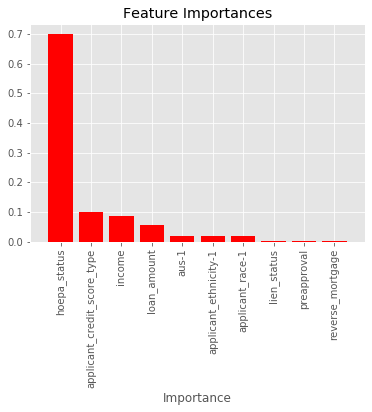

In [70]:
#plot the feature importance, which is calculated in the background and ranked by information gain
#keep in mind feature importance function is not a definitive measure and only serves to give a different
#perspective of the data, may or may not agree with other findings. 
#feature importances function also tends to favor numerical and well populated data

n = 10 # top 10 features (we have 10 total features)

#importances = forest_fit.feature_importances_[:n]
importances = rf_model.feature_importances_[:n]
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = list(tempX.columns[indices])

# Print the feature ranking
print("\n    Feature ranking: \n")

for f in range(n):
    print("%d. %s (%f)" % (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
fig, ax = plt.subplots()

ax.bar(range(10), importances[indices], color="r", align="center")
ax.set_xticks(range(10))
ax.set_xticklabels(features, rotation = 90)
ax.set_xlim([-1, 10])
ax.set_xlabel("Importance")
ax.set_title("Feature Importances")

plt.show()

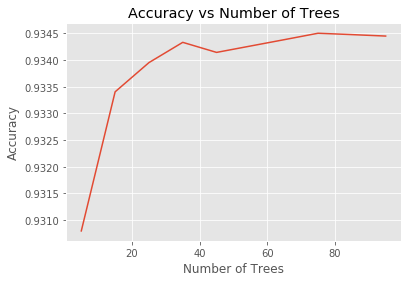

In [73]:
#experiment with diff number of trees

num_trees = range(5, 100, 10)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(n_estimators=n, class_weight='balanced')
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
fig, ax = plt.subplots()
ax.plot(num_trees, accuracies)

ax.set_xlabel("Number of Trees")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs Number of Trees')

plt.show()

In [74]:
#trying decision tree too w logistic regression and random forest

def get_scores(classifier, X_train, X_test, y_train, y_test, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

print("Model, Accuracy, Precision, Recall")
print("Random Forest:", get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, n_estimators=75, class_weight = 'balanced'))
print("Logistic Regression:", get_scores(LogisticRegression, X_train, X_test, y_train, y_test))
print("Decision Tree:", get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test))


Model, Accuracy, Precision, Recall
Random Forest: (0.9343708019501592, 0.9633069298542867, 0.9456225701158029)
Logistic Regression: (0.7260116828425232, 0.7260116828425232, 1.0)
Decision Tree: (0.9228238064331105, 0.9474725183211192, 0.9461527266679141)
